In [ ]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.9/414.9 kB 7.2 MB/s eta 0:00:00


ERROR: Could not find a version that satisfies the requirement mosaicplot (from versions: none)
ERROR: No matching distribution found for mosaicplot


In [ ]:
import pandas as pd

from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import plotly.graph_objects as go


In [ ]:

bitcoin = pd.read_csv('subset_dataset.csv')


FileNotFoundError: ignored

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
from plotly.subplots import make_subplots


df = bitcoin

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on DataFrame
for _, row in df.iterrows():
    G.add_node(row['address'], label=row['label'], n_transactions=row['n_transactions'])
    #G.add_node(row['address'], fee_mean=row['fee_mean'], fee_std=row['fee_std'])
    #G.add_node(row['address'], size_mean=row['size_mean'], size_std=row['size_std'])
    #G.add_node(row['address'], size_mean=row['size_mean'], size_std=row['size_std'])
    #G.add_node(row['address'], size_mean=row['size_mean'], size_std=row['size_std'])

# Create a subplot with the graph visualization
fig = make_subplots(rows=1, cols=1)

# Create a Plotly scatter plot for the graph nodes
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=10
    )
)

# Populate node_trace with node attributes
for node in G.nodes():
    x, y = 0, 0  # You'll need to set the positions or use a layout algorithm
    text = f"Address: {node}<br>Label: {G.nodes[node]['label']}<br>Transactions: {G.nodes[node]['n_transactions']}"
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (text,)

# Add the node_trace to the subplot
fig.add_trace(node_trace)

# Update layout
fig.update_layout(
    title='Bitcoin Addresses Graph Visualization',
    showlegend=False
)

# Show the interactive plot
fig.show()


In [ ]:
pip install pandas plotly ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00


Interactive Boxplot of the Number of Transactions per addresses

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



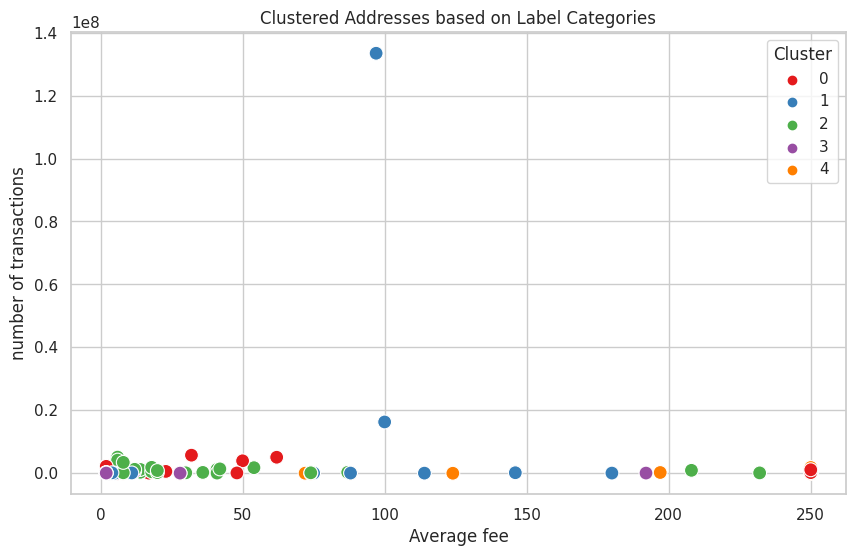

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


df = bitcoin

# Extract numeric labels for clustering
label_mapping = {label: i for i, label in enumerate(df['label'].unique())}
df['LabelCode'] = df['label'].map(label_mapping)

# Prepare data for clustering
X = df[['LabelCode']]

# Perform K-Means clustering
num_clusters = len(df['label'].unique())
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Plot the clustered addresses
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='n_transactions', y='fee_mean', hue='Cluster', palette='Set1', s=100)
plt.title(f'Clustered Addresses based on Label Categories')
plt.xlabel('Average fee')
plt.ylabel('number of transactions')
plt.show()
